

# Generative Adversarial Networks

In [1]:
WH = 64

In [2]:
FILENAME = 'SAGAN_v2'

In [3]:
# # DogsOnly crop

# ComputeLB = False
# DogsOnly = True

# import numpy as np, pandas as pd, os
# import xml.etree.ElementTree as ET 
# import matplotlib.pyplot as plt, zipfile 
# from PIL import Image 

# ROOT = '../input/generative-dog-images/'
# if not ComputeLB: ROOT = '../input/'
# IMAGES = os.listdir(ROOT + 'all-dogs/all-dogs/')
# breeds = os.listdir(ROOT + 'annotation/Annotation/') 

# idxIn = np.zeros(25000); namesIn = []
# idxIn = 0
# imagesIn = np.zeros((25000,64,64,3))
# imagesIn_c = np.zeros((10000,64,64,3))

# idx_c = 0




# # CROP WITH BOUNDING BOXES TO GET DOGS ONLY
# if DogsOnly:
#     breedidx = 0
#     for breed in breeds:
#         breedidx += 1
#         for dog in os.listdir(ROOT+'annotation/Annotation/'+breed):
#             try: img = Image.open(ROOT+'all-dogs/all-dogs/'+dog+'.jpg') 
#             except: continue           
#             tree = ET.parse(ROOT+'annotation/Annotation/'+breed+'/'+dog)
#             root = tree.getroot()
#             objects = root.findall('object')
#             for o in objects:
                
#                 idxIn
                
#                 bndbox = o.find('bndbox') 
#                 xmin = int(bndbox.find('xmin').text)
#                 ymin = int(bndbox.find('ymin').text)
#                 xmax = int(bndbox.find('xmax').text)
#                 ymax = int(bndbox.find('ymax').text)
#                 width = xmax - xmin
#                 height = ymax - ymin
#                 xcenter = (xmax + xmin)/2
#                 ycenter = (ymax + ymin)/2
                
#                 w = np.min((width, height))
                
#                 if width/height > 1.2:
#                     img2 = img.crop((xmin, ymin, xmin+w, ymin+w))
#                     img2 = img2.resize((64,64), Image.ANTIALIAS)
#                     imagesIn[idxIn,:,:,:] = np.asarray(img2)                    
#                     img2 = img.crop((xmax-w, ymax-w, xmax, ymax))
#                     img2 = img2.resize((64,64), Image.ANTIALIAS)
#                     imagesIn_c[idx_c,:,:,:] = np.asarray(img2)
                    
#                     #print(imagesIn_c.shape)
                    
#                     idx_c +=1
                    
# #                     print('here')
# #                     print(idx_c)
#                 elif width/height < 1:
#                     img2 = img.crop((xmin, ymin, xmin+w, ymin+w))
#                     img2 = img2.resize((64,64), Image.ANTIALIAS)
#                     imagesIn[idxIn,:,:,:] = np.asarray(img2)    
                    
                
#                 else : 
#                     img2 = img.crop((xcenter-w/2, ycenter-w/2, xcenter+w/2, ycenter+w/2))
#                     img2 = img2.resize((64,64), Image.ANTIALIAS)
#                     imagesIn[idxIn,:,:,:] = np.asarray(img2)
                    

#                 #if idxIn%1000==0: print(idxIn)
#                 namesIn.append(breed)
#                 idxIn += 1
#                 if idxIn%1000==0:
#                     print(idxIn)
                    

# # RANDOMLY CROP FULL IMAGES
# else:
#     x = np.random.choice(np.arange(20000),10000)
#     for k in range(len(x)):
#         img = Image.open(ROOT + 'all-dogs/all-dogs/' + IMAGES[x[k]])
#         w = img.size[0]; h = img.size[1];
#         if (k%2==0)|(k%3==0):
#             w2 = 100; h2 = int(h/(w/100))
#             a = 18; b = 0          
#         else:
#             a=0; b=0
#             if w<h:
#                 w2 = 64; h2 = int((64/w)*h)
#                 b = (h2-64)//2
#             else:
#                 h2 = 64; w2 = int((64/h)*w)
#                 a = (w2-64)//2
#         img = img.resize((w2,h2), Image.ANTIALIAS)
#         img = img.crop((0+a, 0+b, 64+a, 64+b))  
#         imagesIn[idxIn,:,:,:] = np.asarray(img)
#         namesIn.append(IMAGES[x[k]])
#         #if idxIn%1000==0: print(idxIn)
#         idxIn += 1
    
# # DISPLAY CROPPED IMAGES
# x = np.random.randint(0,idxIn,25)
# for k in range(5):
#     plt.figure(figsize=(15,3))
#     for j in range(5):
#         plt.subplot(1,5,j+1)
#         img = Image.fromarray( imagesIn[x[k*5+j],:,:,:].astype('uint8') )
#         plt.axis('off')
#         if not DogsOnly: plt.title(namesIn[x[k*5+j]],fontsize=11)
#         else: plt.title(namesIn[x[k*5+j]].split('-')[1],fontsize=11)
#         plt.imshow(img)
#     plt.show()

In [4]:
# imagesIn_u = imagesIn[:22100]
# print(imagesIn_u.shape)
# plt.imshow(imagesIn_c[6000]/255)

In [5]:
# images_concat = np.append(imagesIn[:22100]/255, imagesIn_c[:6000]/255, axis=0)

In [6]:
# images_concat.shape

In [7]:
# # save as npy file
# np.save('../np_v10_min.npy', images_concat)

(28100, 64, 64, 3)

In [10]:
import tensorflow as tf
tf.enable_eager_execution()

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import os
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import time
from IPython.display import clear_output

from ops import *

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'1.13.1'

In [ ]:
imagesIn = np.load('../np_v10_min.npy')
imagesIn.shape

In [11]:

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"


In [12]:
BATCH_SIZE = 100
BUFFER_SIZE = 28100
AUTOTUNE = tf.data.experimental.AUTOTUNE
OUTPUT_CHANNELS = 3
EPOCHS = 500
NOISE_DIM = 100
LAMBDA = 100
seed = 1234
WEIGHT_INIT_STDDEV = 0.02

In [13]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize_images(image, [74, 74])
    image = tf.image.random_crop(image, size=[64, 64, 3])
    #image = (image-127.5) / 127.5  # normalize to [-1,1] range
    image = (image / 127.5) - 1
    
    return image

In [14]:
def preprocess_npy(image):

    #image = (image / 127.5) - 1
    image = (image / 0.5) - 1
    #image = tf.image.random_crop(image, [64, 64, 3])
    image = tf.cast(image, tf.float32)
    
    
    return image

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices(imagesIn)
train_dataset = train_dataset.map(preprocess_npy,num_parallel_calls = AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset

<DatasetV1Adapter shapes: (?, 64, 64, 3), types: tf.float32>

In [23]:
noise = tf.random_normal([BATCH_SIZE, NOISE_DIM])
noise.shape

TensorShape([Dimension(100), Dimension(100)])

# Self Attention layer

In [24]:


class Self_attention_layer(tf.keras.Model):
    
    def __init__(self, filters):
        super(Self_attention_layer, self).__init__(name='')
        
        self.filters = filters
        self.filters_d = filters//8
        self.conv2a = tf.keras.layers.Conv2D(filters=self.filters_d, kernel_size=1, strides=(1, 1), use_bias=False)
        self.conv2a_2 = tf.keras.layers.Conv2D(filters=self.filters_d, kernel_size=1, strides=(1, 1), use_bias=False)
        self.conv2b = tf.keras.layers.Conv2D(filters=filters, kernel_size=1, strides=(1, 1), use_bias=False)
        
        self.gamma = tf.get_variable("gamma", [1], initializer=tf.constant_initializer(0.0))
        #self.batch_size = batch_size

    def call(self, input_tensor, training=False):
        
        bs = tf.shape(input_tensor)[0]
        
        f = self.conv2a(input_tensor) # [bs, h, w, c']
        g = self.conv2a_2(input_tensor) # [bs, h, w, c']
        h = self.conv2b(input_tensor) # [bs, h ,w, c ]
        
        gg = tf.reshape(g, [bs, -1, self.filters_d]) # [bs, N, c'] ( N = h*w )
        ff = tf.reshape(f, [bs, -1, self.filters_d])
        
        s = tf.matmul(gg, ff, transpose_b=True)  # 
        
        beta = tf.nn.softmax(s)
        
        o = tf.matmul(beta, tf.reshape(h, [bs, -1, self.filters])) # [bs, N, N] * [bs, h*w, c] = [bs, N, c]
        
        #gamma = tf.get_variable("gamma+", [1], initializer=tf.constant_initializer(0.0))
#         gamma = tf.Variable(initial_value=0)
        
        o = tf.reshape(o, shape=tf.shape(input_tensor))
        x = self.gamma*o + input_tensor

        return x

# block = Self_attention_layer(32)
# #print(block(tf.zeros([1, 4, 4, 32])))
# print([x.name for x in block.trainable_variables])

# Spectral Norm

In [27]:
def spectral_norm(w, iteration=1):
    w_shape = w.shape.as_list()
    w = tf.reshape(w, [-1, w_shape[-1]])

    u = tf.get_variable("u", [1, w_shape[-1]], initializer=tf.random_normal_initializer(), trainable=False)

    u_hat = u
    v_hat = None
    for i in range(iteration):
        """
        power iteration
        Usually iteration = 1 will be enough
        """
        v_ = tf.matmul(u_hat, tf.transpose(w))
        v_hat = tf.nn.l2_normalize(v_)

        u_ = tf.matmul(v_hat, w)
        u_hat = tf.nn.l2_normalize(u_)

    u_hat = tf.stop_gradient(u_hat)
    v_hat = tf.stop_gradient(v_hat)

    sigma = tf.matmul(tf.matmul(v_hat, w), tf.transpose(u_hat))

    with tf.control_dependencies([u.assign(u_hat)]):
        w_norm = w / sigma
        w_norm = tf.reshape(w_norm, w_shape)

    return w_norm

# Build the Generator

### ref : https://www.kaggle.com/jesucristo/introducing-dcgan-dogs-images

In [28]:
def make_generator_model():
    inputs = tf.keras.layers.Input(shape=[NOISE_DIM])
    x = inputs
    layers = [
        tf.keras.layers.Dense(4*4*512, use_bias=False, input_shape=(NOISE_DIM,)),
        tf.keras.layers.Reshape((4, 4, 512)),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        tf.keras.layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                       kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005), # (bs, 8, 8, 256)
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                       kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005), # (bs, 16, 16, 128)
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                       kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005), # (bs, 32, 32, 64)
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
        
        Self_attention_layer(64),
        
        
        tf.keras.layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                       kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005), # (bs, 64, 64, 32)
        tf.keras.layers.LeakyReLU(alpha=0.2),
        
#         tf.keras.layers.Conv2DTranspose(16, (5, 5), strides=(2, 2), padding='same', use_bias=False,
#                                        kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
#         tf.keras.layers.BatchNormalization(epsilon=0.00005), # (bs, 128, 128, 16)
#         tf.keras.layers.LeakyReLU(alpha=0.2),
        
        tf.keras.layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False,
                                       kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV), activation='tanh')
    ] # (bs, 64, 64, 3)
    
    
    
    for i in layers:
        x = i(x)

    return tf.keras.Model(inputs=inputs, outputs=x)



# Build the Discriminator

In [29]:
def make_discriminator_model():
    inputs = tf.keras.layers.Input(shape=[None,None,3])
    x = inputs

    layers = [
        tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        #tf.keras.layers.Dropout(0.5),     # (bs, 64, 64, 32)
        
        tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                              kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        #tf.keras.layers.Dropout(0.5),    # (bs, 32, 32, 64)
        
        tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                              kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        #tf.keras.layers.Dropout(0.5),    # (bs, 16, 16, 128)
        
        Self_attention_layer(128),
        
        tf.keras.layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', use_bias=False,
                              kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        #tf.keras.layers.Dropout(0.5),    # (bs, 16, 16, 256)
        
        tf.keras.layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                              kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV)),
        tf.keras.layers.BatchNormalization(epsilon=0.00005),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        #tf.keras.layers.Dropout(0.5),    # (bs, 8, 8, 512)<=x (bs, 4, 4, 512) 
        
        #tf.keras.layers.Reshape((1,4*4*512)), # (bs, 1, 8192) #<=
        tf.keras.layers.Reshape((4*4*512,)), # (bs, 8192) #<=
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Flatten(), # (bs, 8192) #<=
        
    ]

    for i in layers:
        x = i(x)

        
#     last = tf.keras.layers.Conv2D(1, (5, 5), strides=(2, 2), padding='same', 
#                               kernel_initializer=tf.truncated_normal_initializer(stddev=WEIGHT_INIT_STDDEV))(x)    
#     # (bs, 2, 2, 1)
    
    
#     flatten = tf.keras.layers.Reshape((512*4*4,))(x) # (bs, 8192) #<=
    
#     dense_no_act = tf.keras.layers.Dense(100, input_shape=(512*4*4,), activation=None)(flatten)
#     dense_1 = tf.keras.layers.Dense(100, input_shape=(512*4*4,), activation=tf.keras.activations.sigmoid)(flatten)
    
    logits = tf.keras.layers.Dense(1, input_shape=(512*4*4,), activation=None)(x)  #<=
    
    out = tf.keras.layers.Dense(1, input_shape=(512*4*4,), activation=tf.keras.activations.sigmoid)(x) #<=
#     #out = x
    
    return tf.keras.Model(inputs=inputs, outputs=(out, logits, logits))
    



In [31]:
generator = make_generator_model()
discriminator = make_discriminator_model()

# Losses

In [32]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [33]:
# def discriminator_loss(disc_real, d_real_logits, disc_fake, d_fake_logits):
#     # loss 안 1
#     #real_loss = tf.losses.sigmoid_cross_entropy(tf.ones_like(disc_real), disc_real)
#     #fake_loss = tf.losses.sigmoid_cross_entropy(tf.zeros_like(disc_fake), disc_fake)

    
#     # loss 안 2
#     #real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits,labels=tf.ones_like(disc_real)*random.uniform(0.9, 1.0)))
#     #fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits,labels=tf.zeros_like(disc_fake)*random.uniform(0.9, 1.0)))
    
#     #d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)*random.uniform(0.9, 1.0)))
    
#     # loss 안 3 <=== 수정 (생성함)
#     real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits,labels=tf.ones_like(d_real_logits)*random.uniform(0.9, 1.0)))
#     fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits,labels=tf.zeros_like(d_fake_logits)))
    
#     total_disc_loss = tf.reduce_mean(0.5*(real_loss + fake_loss))

#     return total_disc_loss

In [34]:
# #def generator_loss(disc_generated_output, gen_output, target):
# def generator_loss(disc_real, disc_fake, d_logits_fake):
    
#     #gen_loss = tf.losses.sigmoid_cross_entropy(tf.ones_like(disc_generated_output), disc_generated_output) 
#     gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
#                                                                     labels=tf.ones_like(disc_fake)))
    
#     # mean absolute error
#     #l1_loss = tf.reduce_mean(tf.abs(disc_real - disc_fake))

# #     total_gen_loss = gan_loss + (LAMBDA * l1_loss)
#     total_gen_loss = gen_loss
    
#     return total_gen_loss

# Checkpoint

In [35]:
# checkpoint_path = "../checkpoints/train"

# ckpt = tf.train.Checkpoint(generator=generator,
#                            discriminator=discriminator,
#                            generator_optimizer=generator_optimizer,
#                            discriminator_optimizer=discriminator_optimizer, step=tf.Variable(1))

# ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# Images function

In [36]:

SAVEDIR = 'SAGAN_v2'

if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)
    
input_noise_for_img_gen = tf.random_normal([64, NOISE_DIM], seed=1234)
    
def generate_images(model, epoch):
    
    
    gen_img = model(input_noise_for_img_gen)
    
#     print(input_noise_for_img_gen[0])
#     print(input_noise_for_img_gen[1])

    fig = plt.figure(figsize=(10, 10))


    for i in range(64):
        j = plt.subplot(8, 8, i+1)
        #plt.title(tf.reduce_mean(gen_img[i]))
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(gen_img[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.subplots_adjust(wspace=0.0005, hspace=0.0005)
    x = plt.show()

    
    #plt.imsave('{}.png'.format(str(epoch)), gen_img[2])
    fig.savefig('{}/{}.png'.format(SAVEDIR, epoch))

# Logging

In [37]:
loss_dir = 'logs13'
if not os.path.exists(loss_dir):
    os.mkdir(loss_dir)
summary_writer = tf.contrib.summary.create_file_writer('logs13', flush_millis=10000)
summary_writer.set_as_default()
global_step = tf.train.get_or_create_global_step()

# Training

In [38]:
#status = checkpoint.restore(tf.train.latest_checkpoint(checkpoint_directory))
#ckpt.restore(manager.latest_checkpoint)

np.save('gen_loss',[])
np.save('disc_loss',[])

def train(training_ds, epochs):
    
    
    checkpoint_path = '../checkpoints/'+SAVEDIR
    ckpt = tf.train.Checkpoint(step=tf.Variable(0))
    ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
    ckpt.restore(ckpt_manager.latest_checkpoint)

    for epoch in range(ckpt.step+1,epochs+1):
        start = time.time()
        
        n = 0
        
#         initial_learning_rate = 2e-4
#         learning_rate = tf.compat.v1.train.exponential_decay(initial_learning_rate,
#                                                              epoch, 50, 0.84, staircase=True)
        learning_rate = 0.0004


        generator_optimizer = tf.train.AdamOptimizer(0.0001, beta1=0.001, beta2=0.9)
        discriminator_optimizer = tf.train.AdamOptimizer(0.0004, beta1=0.001, beta2=0.9)

        #checkpoint_path = "../checkpoints/train5"

        ckpt = tf.train.Checkpoint(generator=generator,
                           discriminator=discriminator,
                           generator_optimizer=generator_optimizer,
                           discriminator_optimizer=discriminator_optimizer,
                           step=tf.Variable(ckpt.step))

        ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
        ckpt.restore(ckpt_manager.latest_checkpoint)
        
        gen_loss_list = []
        disc_loss_list = []


#         for real_img in training_ds:
        for real_img in train_dataset:
            start_b = time.time()

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                
                noise = tf.random_normal([BATCH_SIZE, NOISE_DIM])
                
                noise_d = tf.random_normal(shape=[BATCH_SIZE,WH,WH,3],mean=0.0,stddev=random.uniform(0.0, 0.1),dtype=tf.float32)
                #real_noise = real_img+noise_d
                real_noise = real_img #<=== v10-2 수정(추가)
                
                
                fake_img = generator(noise, training=True)
                disc_real, d_real_logits, d_real_dense1 = discriminator(real_noise, training=True)
                disc_fake, d_fake_logits, d_fake_dense1 = discriminator(fake_img, training=True)
                
                
                
                
                gen_loss = generator_loss('hinge', fake=d_fake_logits)
                disc_loss = discriminator_loss('hinge', real=d_real_logits, fake=d_fake_logits) # + GP?
                
                
                
#                 gen_loss = generator_loss(disc_real, disc_fake, d_fake_logits)
#                 disc_loss = discriminator_loss(disc_real, d_real_logits, disc_fake, d_fake_logits)

            generator_gradients = gen_tape.gradient(gen_loss, generator.variables)
            discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.variables)
            
            
            
            #### 추가(loss summary)
            global_step.assign_add(1)
            
#             log_gen_loss(gen_loss)
            
#             log_disc_loss(disc_loss)

#             with tf.contrib.summary.always_record_summaries():
# #                 tf.contrib.summary.scalar('gen_loss', gen_loss)
# #                 tf.contrib.summary.scalar('disc_loss',disc_loss)
#                 tf.contrib.summary.generic('loss',[gen_loss, disc_loss])

            ####
            
           
            
            
            generator_optimizer.apply_gradients(zip(generator_gradients, generator.variables))


            discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.variables))

        
            n += 1

            if n%20==0:
                print("gen_loss : {:1.5f} , disc_loss : {:1.5f}, lr : {:.2E}, time : {:1.4f}"
                      .format(gen_loss.numpy(), disc_loss.numpy(), np.array(learning_rate), time.time()-start_b),end='')
                print(", ckpt.step, epoch : {},{}".format(ckpt.step.numpy(), ckpt.step.numpy()+1))
                gen_loss_list.append(gen_loss.numpy())
                disc_loss_list.append(disc_loss.numpy())
                
        

        
        
        ckpt.step.assign_add(1)
        if int(ckpt.step) % 1 == 0:
            save_path = ckpt_manager.save()
                
        clear_output(wait=True)
        generate_images(generator, ckpt.step.numpy()+1)
        
        
        
        gen_loss_list_all = np.load('gen_loss.npy')
        gen_loss_list_all = np.append(gen_loss_list_all, gen_loss_list)
        np.save('gen_loss.npy', gen_loss_list_all)

        
        disc_loss_list_all = np.load('disc_loss.npy')
        disc_loss_list_all = np.append(disc_loss_list_all, disc_loss_list)
        np.save('disc_loss.npy', disc_loss_list_all)
        
        
        plt.figure(figsize=(10,5))
        plt.plot(gen_loss_list_all, label='g')
        plt.plot(disc_loss_list_all, label='d')
        plt.xlabel("iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        
        
        
        gen_loss_list_all = []
        gen_loss_list = []
        disc_loss_list_all = []
        disc_loss_list = []


        print ('Time taken for epoch {} is {} sec\n'.format(epoch, time.time()-start))
        
    print('lr:{}', np.array(learning_rate()))

noise = tf.random_normal(shape=[BATCH_SIZE,64,64,3],mean=0.0,stddev=random.uniform(0.0, 0.1),dtype=tf.float32)
print(noise.shape)
print('.')
for real_img in train_dataset:
    print('.')
addedd = real_img+noise
print(addedd.shape)

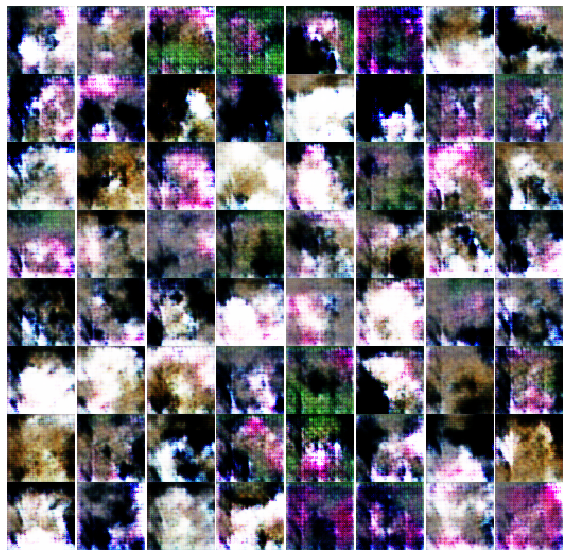

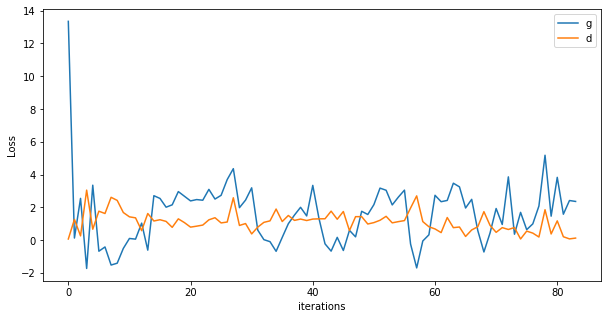

Time taken for epoch 6 is 67.94521689414978 sec

gen_loss : 1.60946 , disc_loss : 0.07111, lr : 4.00E-04, time : 0.2265, ckpt.step, epoch : 6,7


In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
plt.plot(gen_loss_list)
plt.plot(disc_loss_list)
plt.show()

# Save output

In [ ]:

from imageio import imread, imsave, mimsave

if not os.path.exists('../output_images'):
    os.mkdir('../output_images')

n_images=1000
for i_batch in range(0, n_images, BATCH_SIZE):
    #gen_z = torch.randn(im_batch_size, 100, 1, 1, device=device)
    noise_z = tf.random_normal([BATCH_SIZE, NOISE_DIM])
    
    #gen_images = netG(gen_z)
    gen_images = generator(noise_z)
    
    
#     images = gen_images.to("cpu").clone().detach()
#     images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(BATCH_SIZE):
        imsave('../output_images/{}-{}.png'.format(i_batch,i_image), gen_images[i_image])


import shutil
shutil.make_archive('images', 'zip', '../output_images')

In [ ]:
generate_images(generator, 4)

In [ ]:
# gif making

import numpy as np
import tensorflow as tf
s = (200,720,720,3)
loaded_data_list = np.zeros(s)
for i in range(200):
    loaded_data = tf.io.read_file(SAVEDIR+'/{}.png'.format(i+1))
    image = tf.image.decode_jpeg(loaded_data, channels=3)
    loaded_data_list[i] = image
import imageio
imageio.mimsave(SAVEDIR + '/generated.gif', loaded_data_list)

In [ ]:
loaded_data_list_a.shape

In [ ]:
loaded_data = tf.io.read_file(SAVEDIR+'/{}.png'.format(2))

In [ ]:
image = tf.image.decode_jpeg(loaded_data, channels=3)
image